### titulo equis de
con los resultados del anterior notebook se obtiene que los productos de exportacion no tradicionales mas relevantes son las torta de soya que tiene como odigo cuci el 813 y el aceite  de soya que su codigo es 4211, por lo tanto se procede realizar todo el analisis estadistico individual de estos productos.

In [1]:
# Importacion de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We read the data frame data from the first notebook
df_expo = pd.read_csv(r'./data/exportaciones_1992_2022.csv.zip', compression='zip', header=0, sep=',')
df_expo.columns

Index(['GESTION', 'MES', 'FLUJO', 'NANDINA', 'DESNAN', 'PAIS', 'DESPAIS',
       'MEDI', 'DESMEDI', 'VIASAL', 'DESVIA', 'DEPART', 'DESDEP', 'CUCI3',
       'DESCUCI3', 'GCE3', 'DESGCE3', 'CIIUR3', 'DESCIIU3', 'CLTNT', 'KILBRU',
       'VALOR'],
      dtype='object')

In [3]:
# we define this style for the plots
plt.style.use('fivethirtyeight')

In [4]:
# definimos una funcion para para poder graficar de forma mas sencilla los parametros que necesitamos
def cuci_expo(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION'])[col].sum().div(1000000).reset_index()
  df.fillna(0, inplace=True)
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' exports from (1992 - 2021)')
  axes.plot(df['GESTION'], df[col])
  axes.set_xlabel('Year') 
  if col == 'VALOR':
    axes.set_ylabel('Million of Dollars')
  elif col == 'KILBRU':
    axes.set_ylabel('Thousand Tons')
  return plt.show()

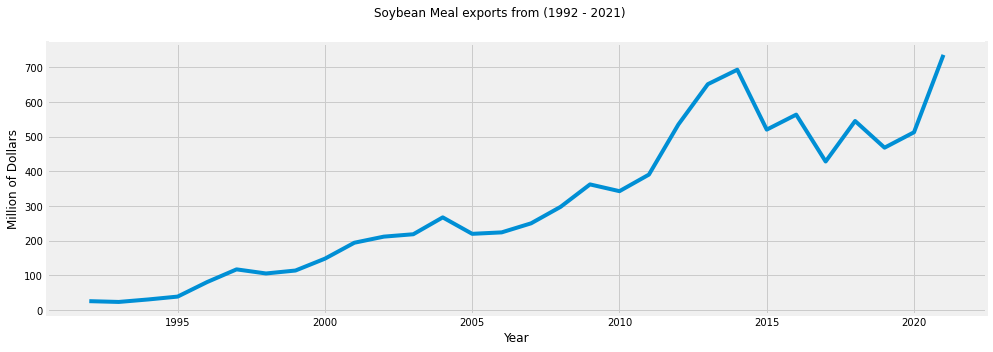

In [7]:
cuci_expo(df_expo, 813, 'VALOR', 'Soybean Meal')

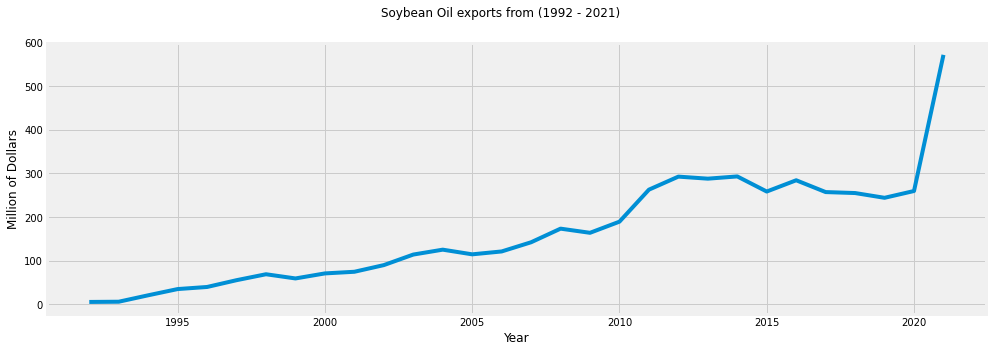

In [6]:
cuci_expo(df_expo, 4211, 'VALOR', 'Soybean Oil')

In [13]:
def cuci_box(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION', 'MES'])[col].sum().reset_index()
  df_aux = df.pivot_table(values=col, index='MES', columns='GESTION', fill_value=0).div(1000000).round(3)
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Evolution (1992 - 2021)')
  years = df['GESTION'].unique()
  axes.boxplot(df_aux)
  axes.set_xticklabels(years,rotation=45)
  axes.set_xlabel('Year') 
  if col == 'VALOR':
    axes.set_ylabel('Millons of Dollars')
  elif col == 'KILBRU':
    axes.set_ylabel('Thounsand Tons')
  return plt.show()


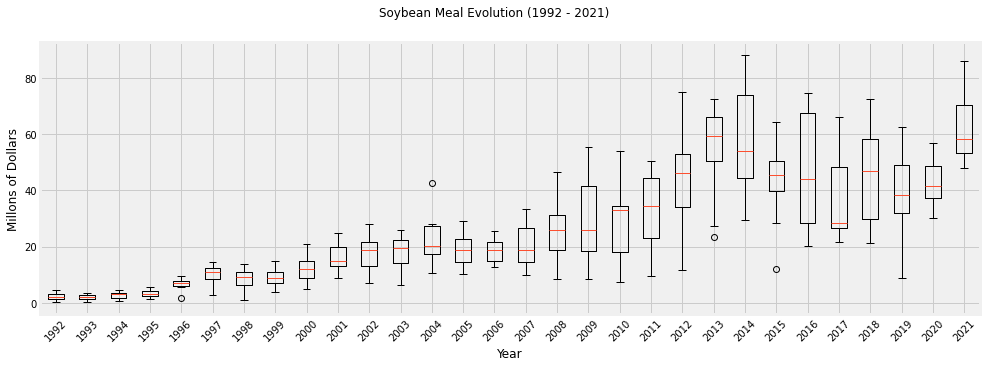

In [14]:
cuci_box(df_expo, 813, 'VALOR', 'Soybean Meal')

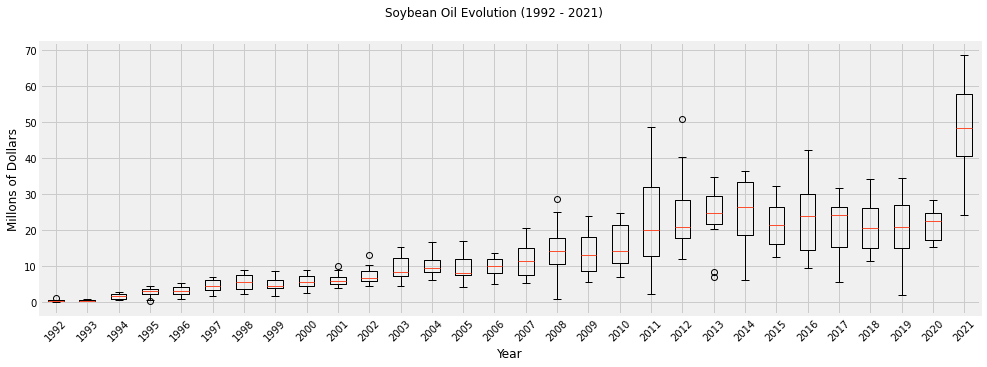

In [15]:
cuci_box(df_expo, 4211, 'VALOR', 'Soybean Oil')

In [18]:
def cuci_box_month(df, cuci, col, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby(['GESTION', 'MES'])[col].sum().reset_index()
  df_aux = df.pivot_table(values=col, index='GESTION', columns='MES', fill_value=0).div(1000000).round(3)
  meses=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Evolution (1992 - 2021)')
  axes.boxplot(df_aux)
  axes.set_xticklabels(meses, rotation=45)
  axes.set_xlabel('Month') 
  if col == 'VALOR':
    axes.set_ylabel('Millons of Dollars')
  elif col == 'KILBRU':
    axes.set_ylabel('Thoundsand Tons')
  return plt.show()

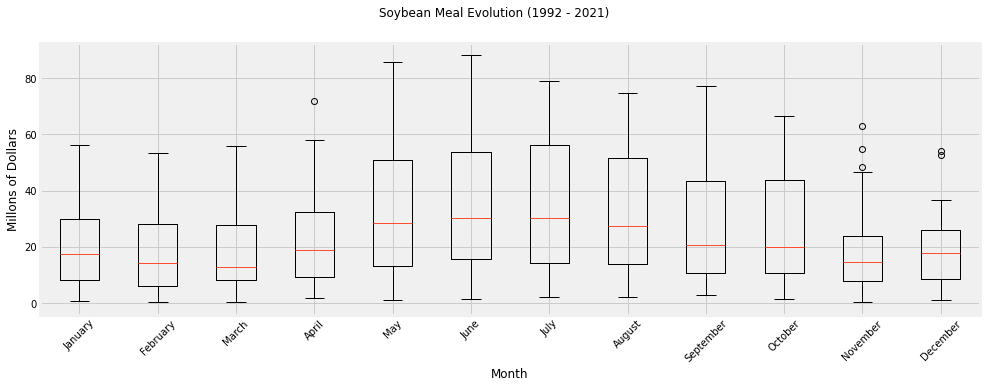

In [19]:
cuci_box_month(df_expo, 813, 'VALOR', 'Soybean Meal')

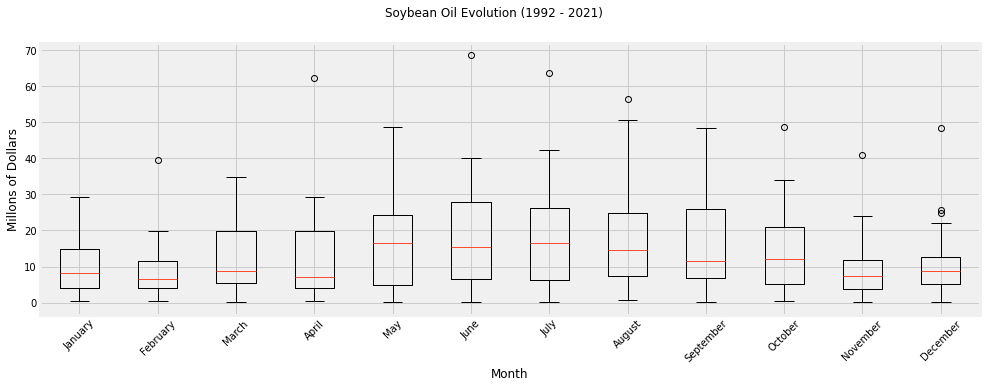

In [20]:
cuci_box_month(df_expo, 4211, 'VALOR', 'Soybean Oil')

In [21]:
def scatter_cuci(df, cuci, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)]
  df = df.loc[:,['VALOR', 'KILBRU']].div(1000000).fillna(0)
  fig, axes = plt.subplots(figsize=(5, 5))
  fig.suptitle(nombre + ' value and volumen correlation (1992 - 2021)')
  axes.scatter(x=df['VALOR'], y=df['KILBRU'])
  axes.set_xlabel('Millons of Dollars') 
  axes.set_ylabel('Thounsand Tons')
  return plt.show()

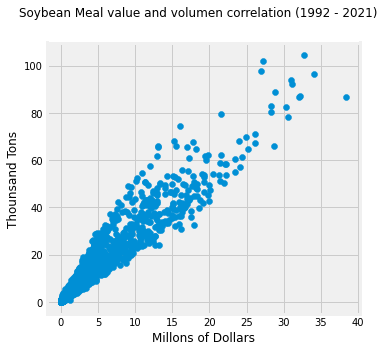

In [22]:
scatter_cuci(df_expo, 813, 'Soybean Meal')

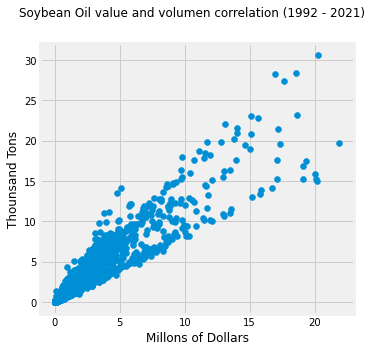

In [23]:
scatter_cuci(df_expo, 4211, 'Soybean Oil')

In [26]:
def hist_unit(df, cuci, nombre, limite):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)]
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000)) 
  df = df[df['UNITARIO'] < limite]
  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Unitary price (1992 - 2021)')
  axes.hist(df['UNITARIO'], bins=100)
  axes.set_xlabel('Dollars / Tons') 
  axes.set_ylabel('Count')
  plt.show()
  return print(df['UNITARIO'].median())

C:\Users\Windows\AppData\Local\Temp/ipykernel_4232/432278908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


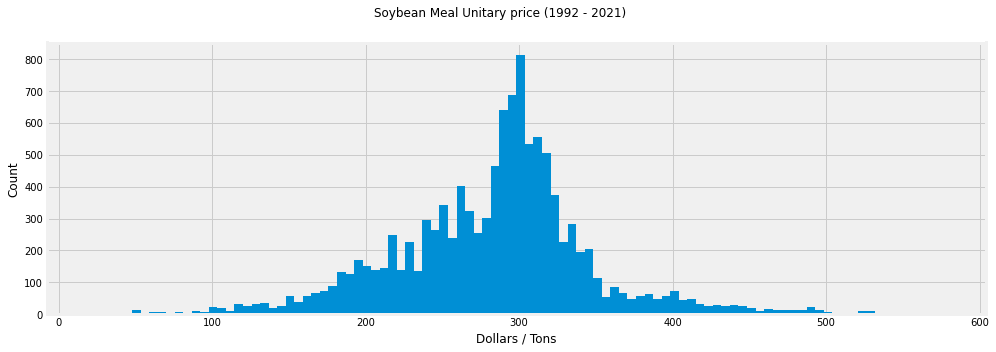

291.5900448430493


In [27]:
hist_unit(df_expo, 813, 'Soybean Meal', 600)

C:\Users\Windows\AppData\Local\Temp/ipykernel_4232/432278908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


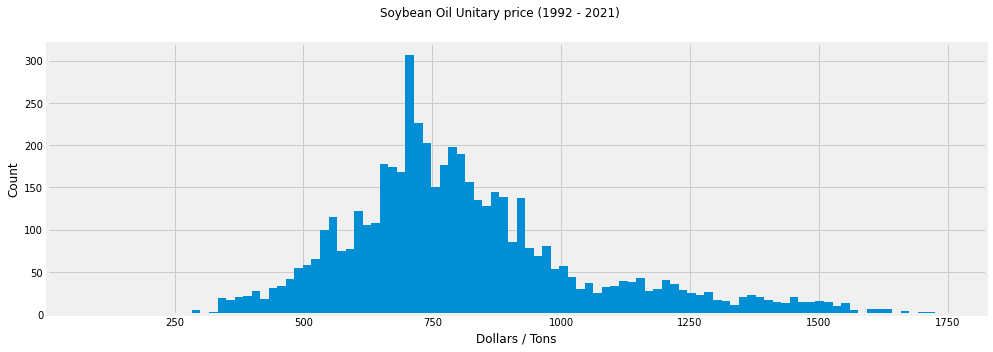

771.999375


In [28]:
hist_unit(df_expo, 4211, 'Soybean Oil', 1800)

In [29]:
def h_bar_plot(df, cuci, col, hue, nombre):
  df = df[(df['GESTION'] <= 2021) & (df['CUCI3'] == cuci)].groupby([hue]
    )[col].sum().div(1000000).reset_index().sort_values(by=col, ascending=False)[:10]
  fig, axes = plt.subplots()  
  sns.barplot(y=hue, x=col, data=df, ax=axes)
  if hue == 'DESVIA':
    axes.set_ylabel('Exit Route')
    fig.suptitle(nombre + ' top exit routes (1992 - 2021)')
  elif hue == 'DESPAIS':
    axes.set_ylabel('Country')
    fig.suptitle(nombre + ' top country buyers (1992 - 2021)')
  elif hue == 'DESMEDI':    
    axes.set_ylabel('Transportation')
    fig.suptitle(nombre + ' top transportation (1992 - 2021)')
  if col == 'VALOR':
    axes.set_xlabel('Millons of Dollars')
  elif col == 'KILBRU':
    axes.set_xlabel('Thounsand Tons')
  return plt.show()

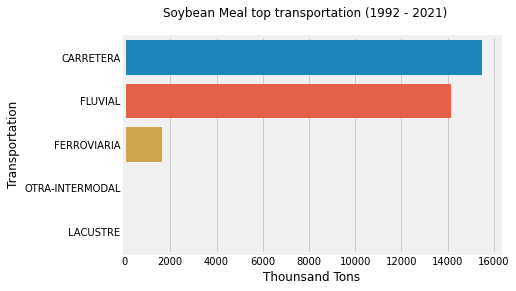

In [30]:
h_bar_plot(df_expo, 813,'KILBRU', 'DESMEDI', 'Soybean Meal')

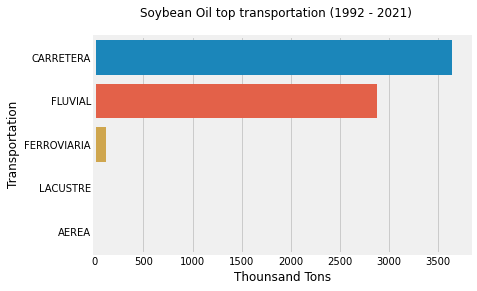

In [31]:
h_bar_plot(df_expo, 4211,'KILBRU', 'DESMEDI', 'Soybean Oil')

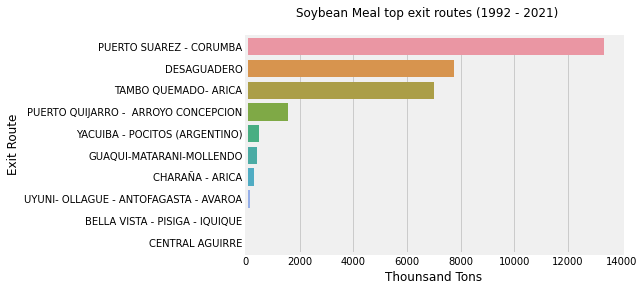

In [32]:
h_bar_plot(df_expo, 813,'KILBRU', 'DESVIA', 'Soybean Meal')

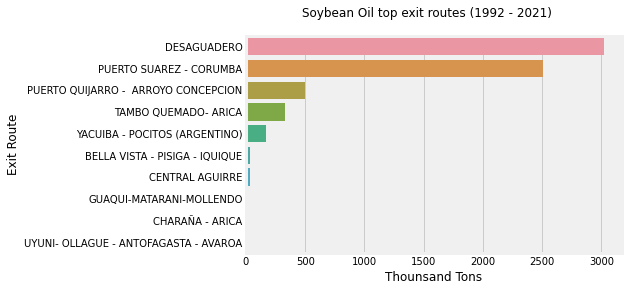

In [33]:
h_bar_plot(df_expo, 4211,'KILBRU', 'DESVIA', 'Soybean Oil')

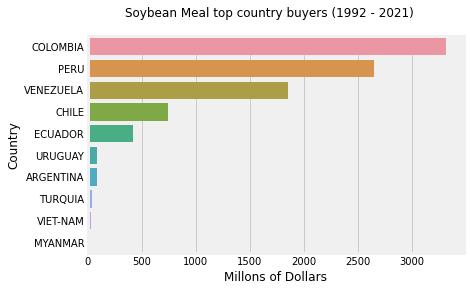

In [34]:
h_bar_plot(df_expo, 813, 'VALOR', 'DESPAIS', 'Soybean Meal')

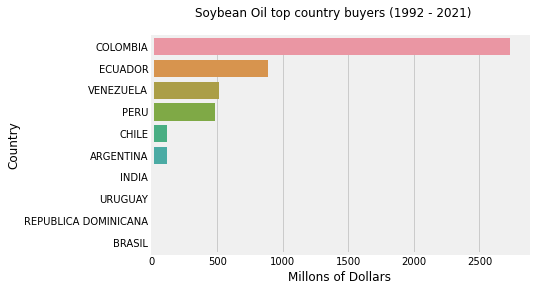

In [35]:
h_bar_plot(df_expo, 4211,'VALOR', 'DESPAIS', 'Soybean Oil')

In [51]:
df_aceite = pd.read_excel(r"./data/future_soybean_oil.xlsx")
df_harina = pd.read_excel(r"./data/future_soybean_meal.xlsx")

In [52]:
df_aceite['Fecha'] = pd.to_datetime(df_aceite['Fecha'], format='%d.%m.%Y')
df_aceite = df_aceite.set_index('Fecha')
df_aceite = df_aceite.sort_index(ascending=True)
df_aceite = df_aceite['Precio']
df_aceite = df_aceite.to_frame()
df_aceite.head()

,Precio
Fecha,
1992-09-01,421.0
1992-10-01,418.0
1992-11-01,437.0
1992-12-01,436.0
1993-01-01,444.0


In [53]:
df_harina['Fecha'] = pd.to_datetime(df_harina['Fecha'], format='%d.%m.%Y')
df_harina = df_harina.set_index('Fecha')
df_harina = df_harina.sort_index(ascending=True)
df_harina = df_harina['Último']
df_harina = df_harina.to_frame()
df_harina = df_harina.rename(columns={"Último": "Precio"})
df_harina.head()

,Precio
Fecha,
1992-01-01,175.8
1992-02-01,174.1
1992-03-01,178.7
1992-04-01,172.9
1992-05-01,183.2


In [54]:
def comm_line(df, cuci, col, nombre, df_1, primero, ultimo):
  df = df[(df['CUCI3'] == cuci)]
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))
  df = df.groupby(['GESTION', 'MES'])['UNITARIO'].mean().reset_index()  
  df = df.rename(columns={"GESTION": "YEAR", "MES": "MONTH"})
  df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(DAY=1))
  df = df.set_index('DATE') 

  fig, axes = plt.subplots(figsize=(15, 5))
  fig.suptitle(nombre + ' Evolution of prices (1992 - 2022)')
  axes.plot(df.index, df['UNITARIO'], label='unitary price')
  axes.plot(df_1.index[primero:ultimo], df_1['Precio'][primero:ultimo], label='international price')
  axes.legend()
  axes.set_xlabel('Year') 
  axes.set_ylabel('Dollars / Ton')
  return plt.show()

C:\Users\Windows\AppData\Local\Temp/ipykernel_4232/2191481946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


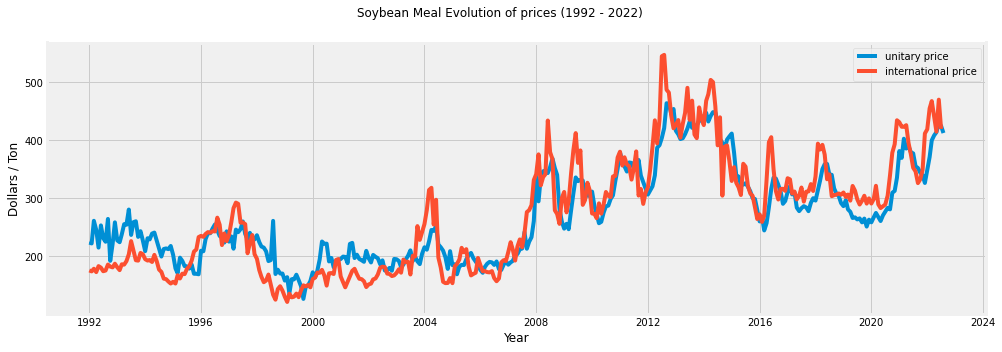

In [55]:
comm_line(df_expo, 813, 'VALOR', 'Soybean Meal', df_harina, 0, -3)

C:\Users\Windows\AppData\Local\Temp/ipykernel_4232/2191481946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNITARIO'] = df['VALOR'].div(df['KILBRU'].div(1000))


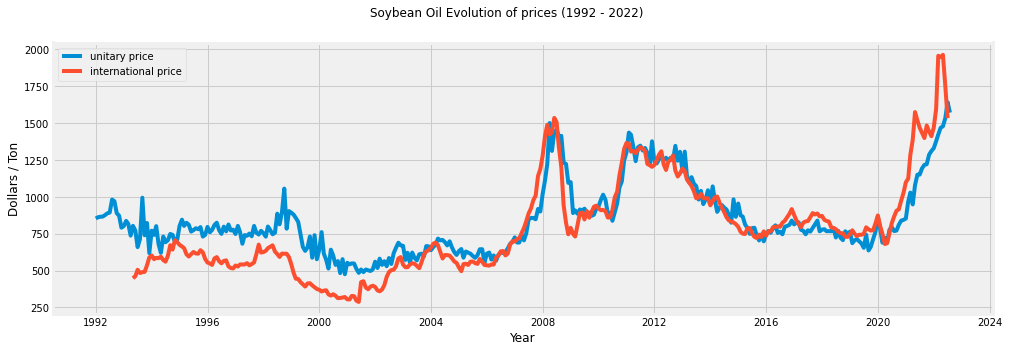

In [56]:
comm_line(df_expo, 4211, 'VALOR', 'Soybean Oil', df_aceite, 8, 360)